# Corner Detection - intersection of 2 lines
1. Harris Detection + SubPix
2. ORB
3. FAST

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

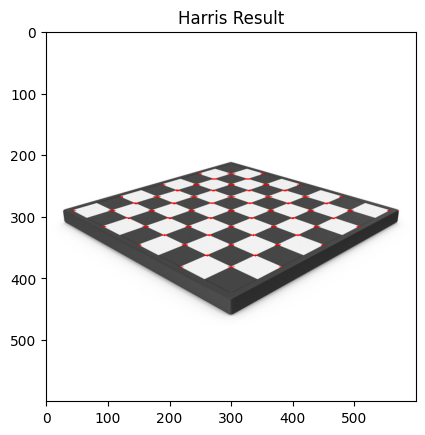

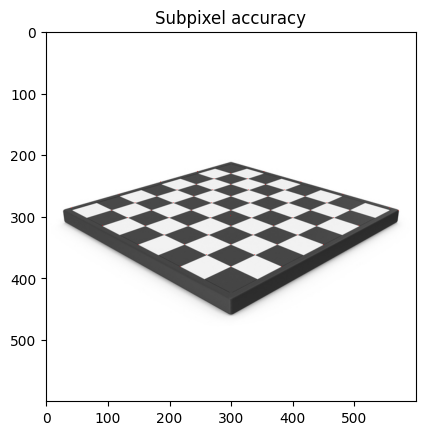

In [4]:
# Harris

img = cv2.imread('chessboard.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = np.float32(img_gray)

#par 2 -> corner size
#par 3 -> sobel kernel size
#par 4 -> harris detector constant

harris = cv2.cornerHarris(img_gray, 2, 5, 0.04)

img_res = img.copy()

img_res[harris > 0.01 * harris.max()] = [0, 0, 255] #BGR

img_res = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)

plt.imshow(img_res)
plt.title('Harris Result')
plt.show()

# Subpixel accuracy
# Centroid - average position of all the points in the corner

_, thresh = cv2.threshold(harris, 0.01 * harris.max(), 255, 0)
thresh = np.uint8(thresh)

_,_,_,corner_centroids = cv2.connectedComponentsWithStats(thresh)

# criteria
# determines when to the corner algorithm stops
# par 1 -> how many iterantions, n times, compare the result of now to before
# par 2 -> stops after n iterations
# par 3 -> stops when the position of the corner changes
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

corner_centroids = np.float32(corner_centroids)

# par 3 -> windowSize (area of the corner that is most accurate)
# par 4 -> the size of the area that isn't needed (-1,-1) means that the parameter isn't used


corners = cv2.cornerSubPix(img_gray, corner_centroids, (5, 5), (-1, -1), criteria)
with_subpix = img.copy()

corners = np.int16(corners)

for corner in corners:
    corner_y = corner[1]
    corner_x = corner[0]
    with_subpix[corner_y, corner_x] = [0, 0, 255]

with_subpix = cv2.cvtColor(with_subpix, cv2.COLOR_BGR2RGB)

plt.imshow(with_subpix)
plt.title('Subpixel accuracy')
plt.show()

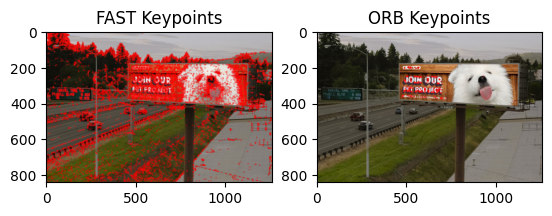

In [6]:
# FAST (Features from Accelerated Segment Test)
# - Faster, less accurate
# - many redundancies

# ORB (Oriented FAST and Rotated BRIEF)
# - FAST + BRIEF descriptor + modifications
# - Better performing accuracy wise
# - slower than FAST

#FAST
img2 = cv2.imread('bilboard.jpeg')

fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(img2)

fast_res = img2.copy()

cv2.drawKeypoints(img2, keypoints, fast_res, color=(0, 0, 255))

plt.subplot(1,2,1)
plt.title('FAST Keypoints')
plt.imshow(cv2.cvtColor(fast_res, cv2.COLOR_BGR2RGB))

#ORB
orb = cv2.ORB_create()
keypoints = orb.detect(img2)

orb_res = img2.copy()

cv2.drawKeypoints(img2, keypoints, orb_res, color=(0, 0, 255))

plt.subplot(1,2,2)
plt.title('ORB Keypoints')
plt.imshow(cv2.cvtColor(orb_res, cv2.COLOR_BGR2RGB))


